In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import tqdm
import pandas as pd

In [2]:
y_list = np.load('../y_list.npy')

In [3]:
mel_list = []
timing = []
for e in range(5):
    t_start = time.time()
    for i in tqdm.tqdm(y_list, leave=True):
        spec = cqt(i, sr=44100, n_bins=84, bins_per_octave=24, fmin=220)
        mel_list.append(spec)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

  0%|          | 2/1770 [00:00<01:41, 17.35it/s]

102.26895475387573


  0%|          | 2/1770 [00:00<01:40, 17.58it/s]

101.66111612319946


  0%|          | 2/1770 [00:00<02:23, 12.30it/s]

101.10167407989502


  0%|          | 2/1770 [00:00<01:40, 17.63it/s]

101.8818793296814


100%|██████████| 1770/1770 [01:43<00:00, 17.45it/s]

103.02958393096924


In [4]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  101.98864164352418
std =  0.6430425962061305


In [5]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'librosa'

In [6]:
data.to_csv('librosa_CQT')

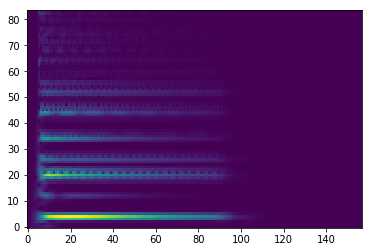

In [7]:
plt.imshow(abs(mel_list[0]), aspect='auto', origin='lower')